UK Online Student Engagement Data Science Project




Group 6: Olivia Pierret, Molly Sullivan, Henry Lee, Madeline Zitella

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

# Upload file
uploaded = files.upload()
df = pd.read_csv('UK online student engagement.csv', index_col=0)

# Data preprocessing:

def standardize_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

def rename_columns(df):
    df.rename(columns={'droupout': 'dropout'}, inplace=True)
    df.rename(columns={'fourm_q': 'forum_q', 'fourm_a': 'forum_a'}, inplace=True)
    return df

def convert_year_column(df):
    df = df.replace({"first": 1, "second": 2, "third": 3})
    df['year'] = df['year'].astype('int64').astype('float64')
    return df

def convert_yn_columns(df):
    df['dropout'] = df['dropout'].map({'Y': 1, 'N': 0})
    df['external'] = df['external'].map({'Y': 1, 'N': 0})
    return df

def convert_grades_to_numeric(df):
    grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
    grade_columns = ['test_1', 'test_2', 'test_3', 'ind_cw', 'group_cw', 'final_grade']
    for col in grade_columns:
        df[col] = df[col].map(grade_mapping)
    return df

def enforce_numeric_types(df):
    df = df.astype({col: 'float64' for col in df.select_dtypes(include='int64').columns})
    return df

# make new column for office hours attended per test taken
def office_hour_visits_per_test(df):
    # count how many test columns are NOT NaN for each student
    test_cols = ['test_1', 'test_2', 'test_3', 'final_grade']
    df['tests_taken'] = df[test_cols].notna().sum(axis=1)

    # divide by tests taken
    df['office_hour_visits_per_test_taken'] = df['office_hour_visits'] / df['tests_taken'].replace(0, np.nan)

    # drop tests taken column
    df.drop(columns=['tests_taken'], inplace=True)

    # drop visits
    df.drop(columns=['office_hour_visits'], inplace=True)

    return df

# make new column for forum questions answers per test taken
def forum_answers_per_test(df):
    # count how many test columns are NOT NaN for each student
    test_cols = ['test_1', 'test_2', 'test_3', 'final_grade']
    df['tests_taken'] = df[test_cols].notna().sum(axis=1)

    # divide by test taken
    df['forum_answers_per_test_taken'] = df['forum_a'] / df['tests_taken'].replace(0, np.nan)

    # drop tests taken column
    df.drop(columns=['tests_taken'], inplace=True)

    # drop forum answers
    df.drop(columns=['forum_a'], inplace=True)


    return df

# make new column for forum questions answers per test taken
def forum_questions_per_test(df):
    # count how many test columns are NOT NaN for each student
    test_cols = ['test_1', 'test_2', 'test_3', 'final_grade']
    df['tests_taken'] = df[test_cols].notna().sum(axis=1)

    # divide by tests taken
    df['forum_questions_per_test_taken'] = df['forum_q'] / df['tests_taken'].replace(0, np.nan)

    # drop test taken
    df.drop(columns=['tests_taken'], inplace=True)

    # drop forum questions
    df.drop(columns=['forum_q'], inplace=True)

    return df

# Unit tests to ensure data is properly cleaned
def test_cleaned_data(df):
    grade_columns = ['test_1', 'test_2', 'test_3', 'ind_cw', 'group_cw', 'final_grade']
    # Check that data is cleaned and ready for modelling
    assert all(col == col.lower() for col in df.columns), "Some columns are not lowercase"
    assert all(' ' not in col for col in df.columns), "Some columns contain spaces"
    assert df['year'].dtype == 'float64', "'year' column is not float64"
    assert df['year'].isin([1, 2, 3]).all(), "Unexpected values in 'year' column"
    assert df['dropout'].isin([0, 1]).all(), "'dropout' contains values other than 0 and 1"
    assert df['external'].isin([0, 1]).all(), "'external' contains values other than 0 and 1"
    for col in grade_columns:
        assert df[col].dropna().isin([0, 1, 2, 3, 4]).all(), f"{col} contains unexpected values"
    # Check new features
    expected_new_columns = [
        'office_hour_visits_per_test_taken',
        'forum_answers_per_test_taken',
        'forum_questions_per_test_taken'
    ]
    for col in expected_new_columns:
        assert col in df.columns, f"Missing expected column: {col}"

    # Check for non-negative values and no inf or NaN
    for col in expected_new_columns:
        assert df[col].dropna().ge(0).all(), f"{col} contains negative values"
        assert not np.isinf(df[col]).any(), f"{col} contains infinite values"

    # Check dropped columns are actually dropped
    dropped_cols = ['office_hour_visits', 'forum_q', 'forum_a']
    for col in dropped_cols:
        assert col not in df.columns, f"{col} should have been dropped"
    print("All unit tests passed. Data is cleaned.")

def clean_data(df):
    df = standardize_column_names(df)
    df = rename_columns(df)
    df = convert_year_column(df)
    df = convert_yn_columns(df)
    df = convert_grades_to_numeric(df)
    df = enforce_numeric_types(df)
    df = office_hour_visits_per_test(df)
    df = forum_answers_per_test(df)
    df = forum_questions_per_test(df)
    test_cleaned_data(df)
    return df

df = clean_data(df)

# Split dataset into cohorts
def create_cohorts(df):
     cohort1 = df[df['test_1'].notna()].copy().dropna(axis=1)
     cohort2 = df[df['test_2'].notna()].copy().dropna(axis=1)
     cohort3 = df[df['test_3'].notna()].copy().dropna(axis=1)
     cohort4 = df[df['final_grade'].notna()].copy().dropna(axis=1)
     return cohort1, cohort2, cohort3, cohort4

# create cohorts
cohort1, cohort2, cohort3, cohort4 = create_cohorts(df)




# Display cleaned cohorts
display(cohort1.head())
display(cohort2.head())
display(cohort3.head())
display(cohort4.head())

# Print cohort sizes
print(f"Number of students in cohort1: {len(cohort1)}")
print(f"Number of students in cohort2: {len(cohort2)}")
print(f"Number of students in cohort3: {len(cohort3)}")
print(f"Number of students in cohort4: {len(cohort4)}")

Saving UK online student engagement.csv to UK online student engagement.csv


<ipython-input-4-e48acbcf43a4>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"first": 1, "second": 2, "third": 3})


All unit tests passed. Data is cleaned.


external  year  session_1  session_2  test_1  dropout  \
0       0.0   3.0       13.0       20.0     0.0      1.0   
1       0.0   3.0       71.0       77.0     4.0      0.0   
2       1.0   1.0       32.0       62.0     0.0      0.0   
3       1.0   1.0        8.0        4.0     0.0      0.0   
4       1.0   1.0        6.0        1.0     0.0      0.0   

   office_hour_visits_per_test_taken  forum_answers_per_test_taken  \
0                               1.00                          0.00   
1                               1.00                          1.00   
2                               0.75                          2.25   
3                               1.50                          1.00   
4                               1.75                          2.25   

   forum_questions_per_test_taken  
0                            1.00  
1                            3.25  
2                            4.00  
3                            5.50  
4                            4.75

external  year  session_1  session_2  test_1  session_3  session_4  test_2  \
1       0.0   3.0       71.0       77.0     4.0       40.0       67.0     4.0   
2       1.0   1.0       32.0       62.0     0.0       76.0       77.0     4.0   
3       1.0   1.0        8.0        4.0     0.0       46.0       36.0     2.0   
4       1.0   1.0        6.0        1.0     0.0       23.0       33.0     1.0   
5       0.0   3.0       87.0       67.0     4.0       15.0       69.0     0.0   

   dropout  office_hour_visits_per_test_taken  forum_answers_per_test_taken  \
1      0.0                               1.00                          1.00   
2      0.0                               0.75                          2.25   
3      0.0                               1.50                          1.00   
4      0.0                               1.75                          2.25   
5      1.0                               1.00                          0.00   

   forum_questions_per_test_taken  
1                            3.25  
2                            4.00  
3                            5.50  
4                            4.75  
5                            2.00

external  year  session_1  session_2  test_1  session_3  session_4  test_2  \
1       0.0   3.0       71.0       77.0     4.0       40.0       67.0     4.0   
2       1.0   1.0       32.0       62.0     0.0       76.0       77.0     4.0   
3       1.0   1.0        8.0        4.0     0.0       46.0       36.0     2.0   
4       1.0   1.0        6.0        1.0     0.0       23.0       33.0     1.0   
5       0.0   3.0       87.0       67.0     4.0       15.0       69.0     0.0   

   session_5  test_3  dropout  office_hour_visits_per_test_taken  \
1       69.0     4.0      0.0                               1.00   
2       35.0     0.0      0.0                               0.75   
3       93.0     3.0      0.0                               1.50   
4       90.0     2.0      0.0                               1.75   
5       67.0     0.0      1.0                               1.00   

   forum_answers_per_test_taken  forum_questions_per_test_taken  
1                          1.00                            3.25  
2                          2.25                            4.00  
3                          1.00                            5.50  
4                          2.25                            4.75  
5                          0.00                            2.00

external  year  session_1  session_2  test_1  session_3  session_4  test_2  \
1       0.0   3.0       71.0       77.0     4.0       40.0       67.0     4.0   
2       1.0   1.0       32.0       62.0     0.0       76.0       77.0     4.0   
3       1.0   1.0        8.0        4.0     0.0       46.0       36.0     2.0   
4       1.0   1.0        6.0        1.0     0.0       23.0       33.0     1.0   
6       1.0   2.0        9.0       25.0     0.0       22.0       40.0     2.0   

   session_5  test_3  session_6  ind_cw  group_cw  final_grade  dropout  \
1       69.0     4.0       41.0     4.0       4.0          1.0      0.0   
2       35.0     0.0       93.0     0.0       0.0          3.0      0.0   
3       93.0     3.0       79.0     4.0       1.0          3.0      0.0   
4       90.0     2.0       82.0     2.0       4.0          2.0      0.0   
6       72.0     3.0       32.0     2.0       3.0          4.0      0.0   

   office_hour_visits_per_test_taken  forum_answers_per_test_taken  \
1                               1.00                          1.00   
2                               0.75                          2.25   
3                               1.50                          1.00   
4                               1.75                          2.25   
6                               1.75                          0.75   

   forum_questions_per_test_taken  
1                            3.25  
2                            4.00  
3                            5.50  
4                            4.75  
6                            3.00

Number of students in cohort1: 11249
Number of students in cohort2: 10309
Number of students in cohort3: 9063
Number of students in cohort4: 8088


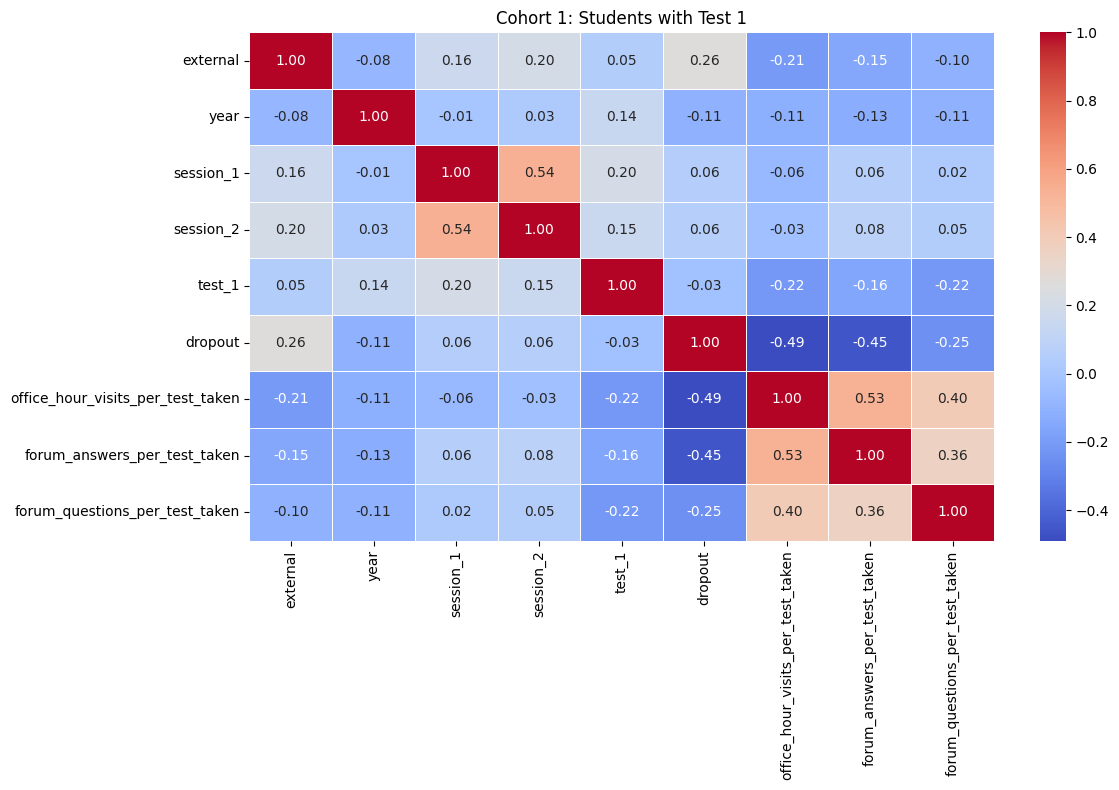

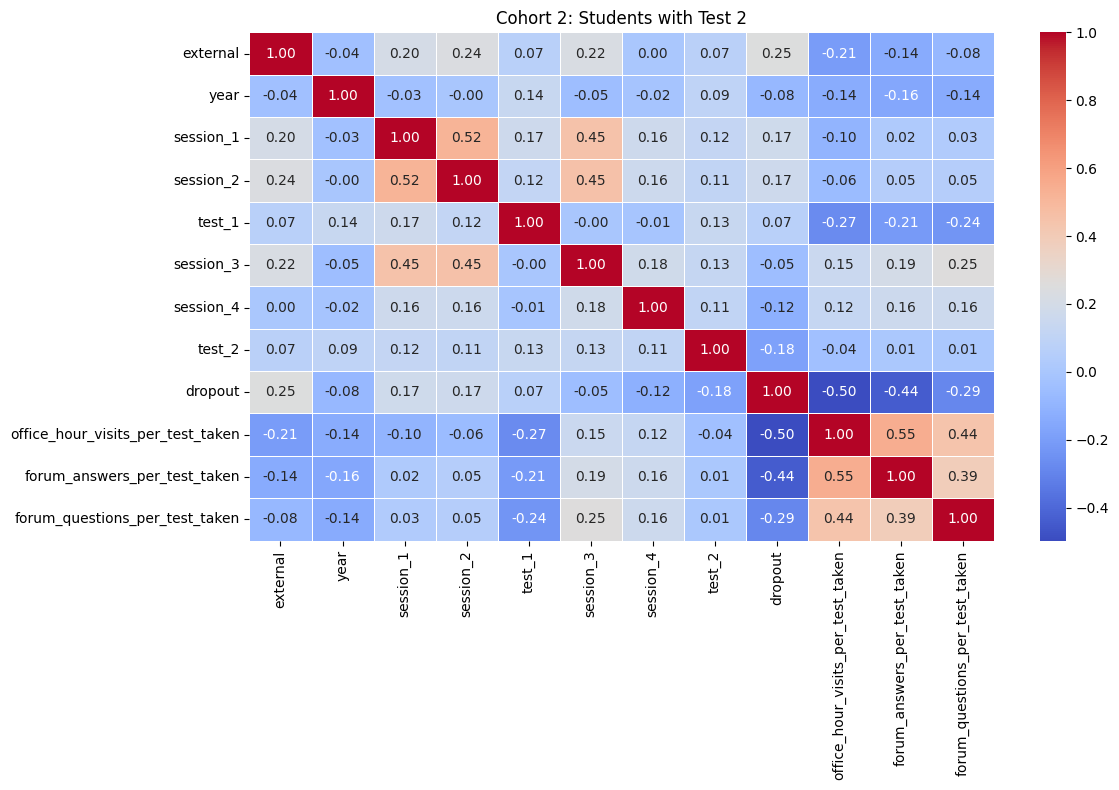

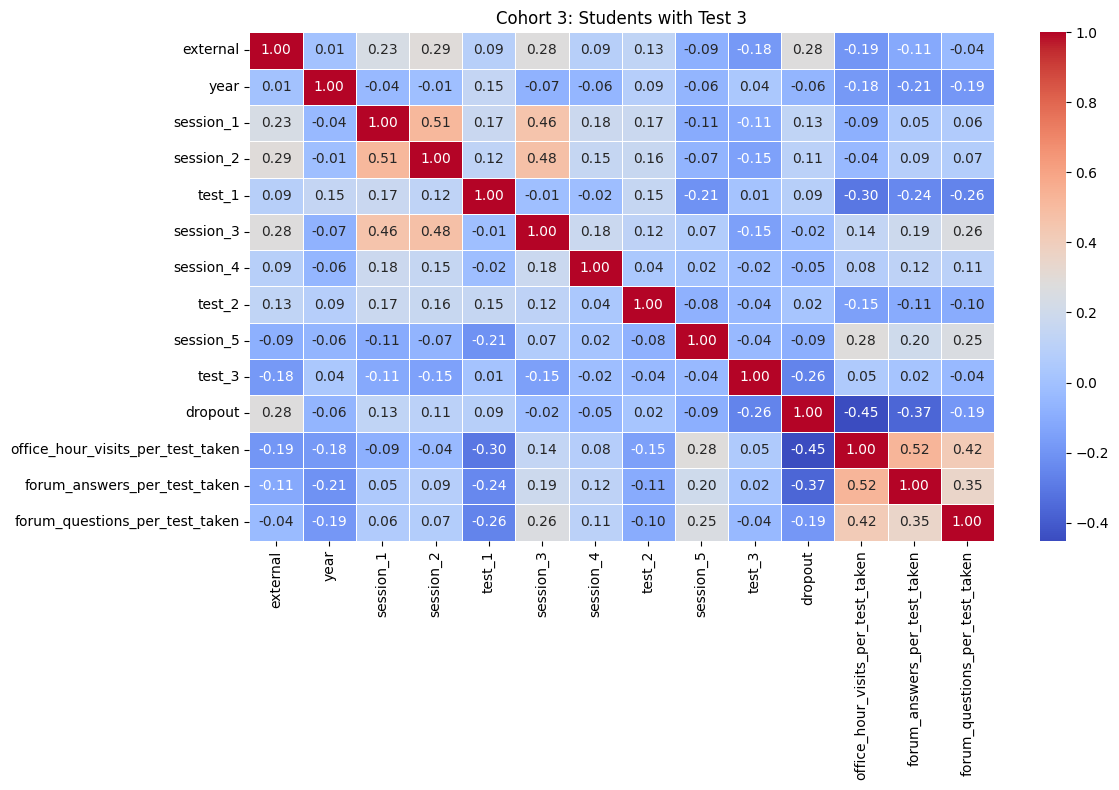

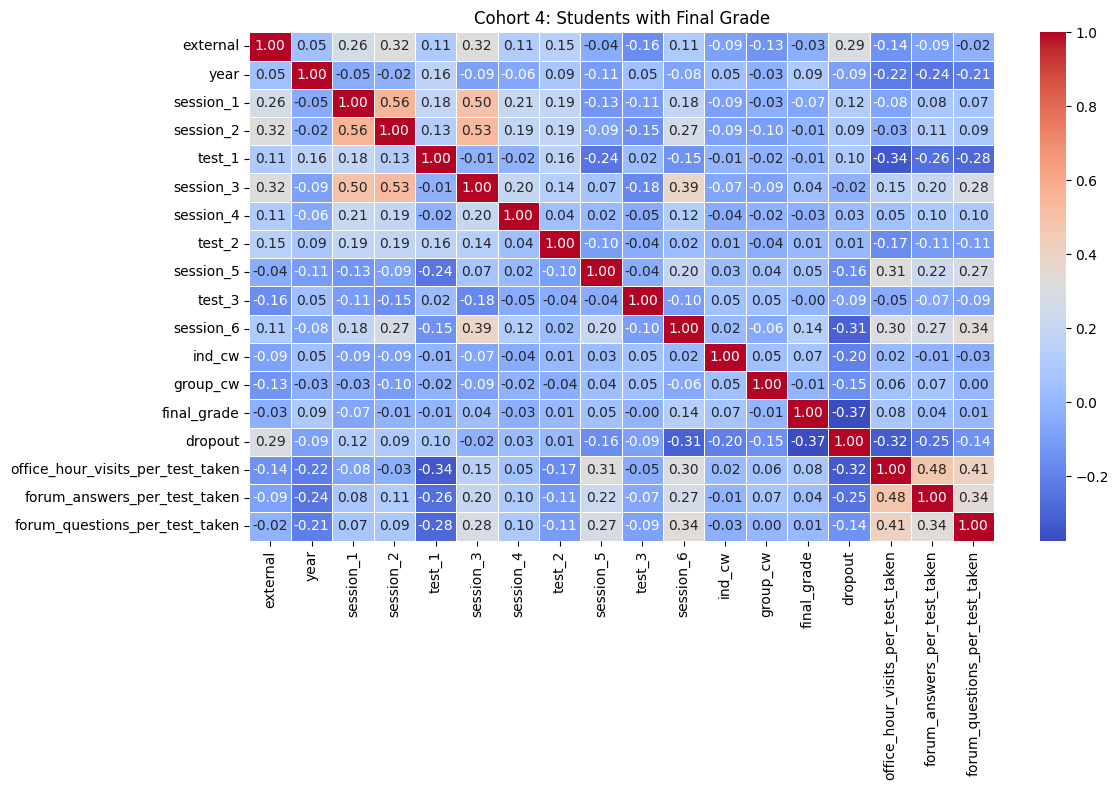

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df, title):
    plt.figure(figsize=(12, 8))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Plotting for each cohort
plot_correlation_matrix(cohort1, "Cohort 1: Students with Test 1")
plot_correlation_matrix(cohort2, "Cohort 2: Students with Test 2")
plot_correlation_matrix(cohort3, "Cohort 3: Students with Test 3")
plot_correlation_matrix(cohort4, "Cohort 4: Students with Final Grade")


In [ ]:
# Naive Bayes 4/21

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

def run_naive_bayes(cohort_df, cohort_name):
  print(f"----- Running Naive Bayes for {cohort_name} -----")

  # this is already done but just a double check - drop rows with NaNs
  cohort_df_clean = cohort_df.dropna()

  # separate features (X) and target (y)
  y = cohort_df_clean['dropout']
  X = cohort_df_clean.drop(columns=['dropout'])
  X = X.select_dtypes(include=[np.number])  # keep only numeric features for this

  # split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # train the naive bayes model
  model = GaussianNB()
  model.fit(X_train, y_train)

  # predict and evaluate
  y_pred = model.predict(X_test)
  # acc = accuracy_score(y_test, y_pred)
  # f1 = f1_score(y_test, y_pred)

  print("Accuracy:", accuracy_score(y_test, y_pred))
  print("Classification Report:\n", classification_report(y_test, y_pred))
  print()

# run on each cohort
run_naive_bayes(cohort1, "Cohort 1")
run_naive_bayes(cohort2, "Cohort 2")
run_naive_bayes(cohort3, "Cohort 3")
run_naive_bayes(cohort4, "Cohort 4")

----- Running Naive Bayes for Cohort 1 -----
Accuracy: 0.7333333333333333
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.72      0.78      1460
         1.0       0.59      0.76      0.67       790

    accuracy                           0.73      2250
   macro avg       0.72      0.74      0.72      2250
weighted avg       0.76      0.73      0.74      2250


----- Running Naive Bayes for Cohort 2 -----
Accuracy: 0.8506304558680893
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.86      0.89      1459
         1.0       0.71      0.84      0.77       603

    accuracy                           0.85      2062
   macro avg       0.82      0.85      0.83      2062
weighted avg       0.86      0.85      0.85      2062


----- Running Naive Bayes for Cohort 3 -----
Accuracy: 0.9007170435741865
Classification Report:
               precision    recall  f1-score   supp

In [ ]:
# monday april 21
# decision trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# List of your cohorts
cohorts = [
    ('Cohort 1', cohort1),
    ('Cohort 2', cohort2),
    ('Cohort 3', cohort3),
    ('Cohort 4', cohort4)
]

# loop through each four cohort
for name, cohort in cohorts:
    print(f"\n Decision Tree Results for {name}")

    # clean the data
    X = cohort.drop(columns=['dropout'])
    y = cohort['dropout']

    # handle missing values
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # scale
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)

    # split to test and train
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # train
    dt = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt.fit(X_train, y_train)

    # predict
    y_pred = dt.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    # print resutls
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(matrix)


 Decision Tree Results for Cohort 1
Accuracy: 0.9027
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      1460
         1.0       0.85      0.88      0.86       790

    accuracy                           0.90      2250
   macro avg       0.89      0.90      0.89      2250
weighted avg       0.90      0.90      0.90      2250

Confusion Matrix:
[[1338  122]
 [  97  693]]

 Decision Tree Results for Cohort 2
Accuracy: 0.9059
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      1459
         1.0       0.83      0.85      0.84       603

    accuracy                           0.91      2062
   macro avg       0.88      0.89      0.89      2062
weighted avg       0.91      0.91      0.91      2062

Confusion Matrix:
[[1356  103]
 [  91  512]]

 Decision Tree Results for Cohort 3
Accuracy: 0.9322
Classification Report:
              precision  

In [ ]:
# April 22
# neural network mlpclassifier

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

cohorts = [
    ('Cohort 1', cohort1),
    ('Cohort 2', cohort2),
    ('Cohort 3', cohort3),
    ('Cohort 4', cohort4)
]

# loop through each of the four cohorts
for name, cohort in cohorts:
    print(f"\n Results for {name}")

    X = cohort.drop(columns=['dropout'])
    y = cohort['dropout']

    # handle missing values (replace with mean)
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # scale
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)

    # split data to train and test
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # build model and train
    nn = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500, random_state=42)
    nn.fit(X_train, y_train)

    # predict and evaluate
    y_pred = nn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(matrix)



 Results for Cohort 1
Accuracy: 0.9284
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      1460
         1.0       0.91      0.88      0.90       790

    accuracy                           0.93      2250
   macro avg       0.92      0.92      0.92      2250
weighted avg       0.93      0.93      0.93      2250

Confusion Matrix:
[[1392   68]
 [  93  697]]

 Results for Cohort 2


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9282
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1459
         1.0       0.88      0.87      0.88       603

    accuracy                           0.93      2062
   macro avg       0.91      0.91      0.91      2062
weighted avg       0.93      0.93      0.93      2062

Confusion Matrix:
[[1387   72]
 [  76  527]]

 Results for Cohort 3
Accuracy: 0.9498
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1442
         1.0       0.90      0.84      0.87       371

    accuracy                           0.95      1813
   macro avg       0.93      0.91      0.92      1813
weighted avg       0.95      0.95      0.95      1813

Confusion Matrix:
[[1409   33]
 [  58  313]]

 Results for Cohort 4
Accuracy: 0.9845
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99  


 random forest results for Cohort 1
Accuracy: 0.9453
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1460
         1.0       0.95      0.89      0.92       790

    accuracy                           0.95      2250
   macro avg       0.95      0.93      0.94      2250
weighted avg       0.95      0.95      0.94      2250

Confusion Matrix:
[[1424   36]
 [  87  703]]


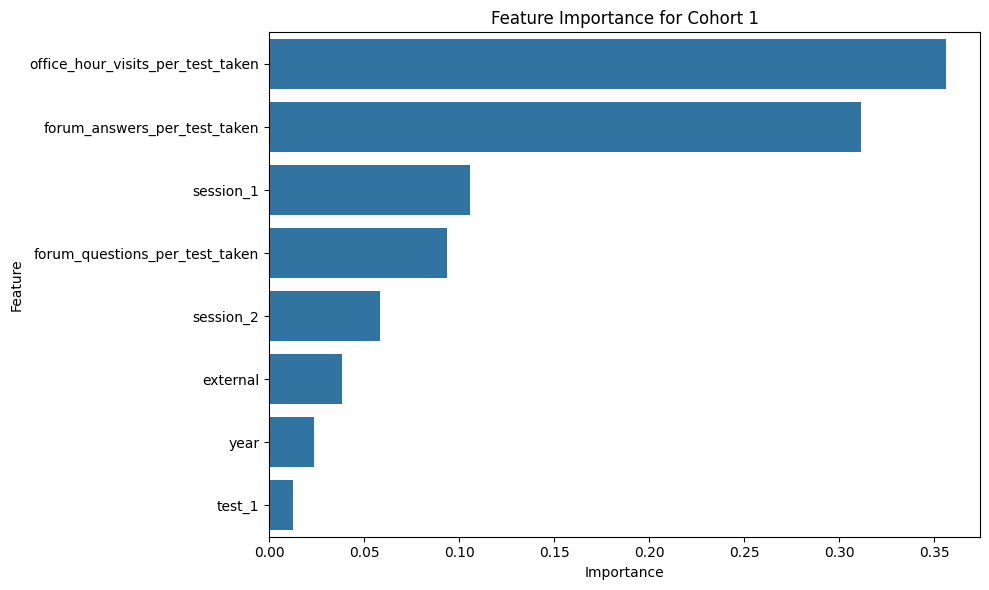

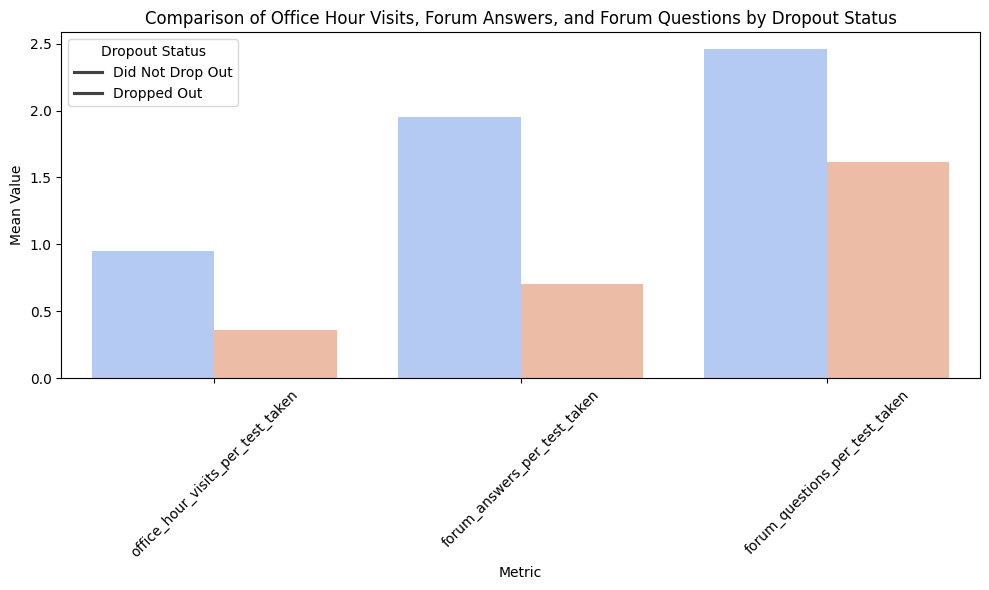


 random forest results for Cohort 2
Accuracy: 0.9597
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1459
         1.0       0.95      0.91      0.93       603

    accuracy                           0.96      2062
   macro avg       0.96      0.94      0.95      2062
weighted avg       0.96      0.96      0.96      2062

Confusion Matrix:
[[1433   26]
 [  57  546]]


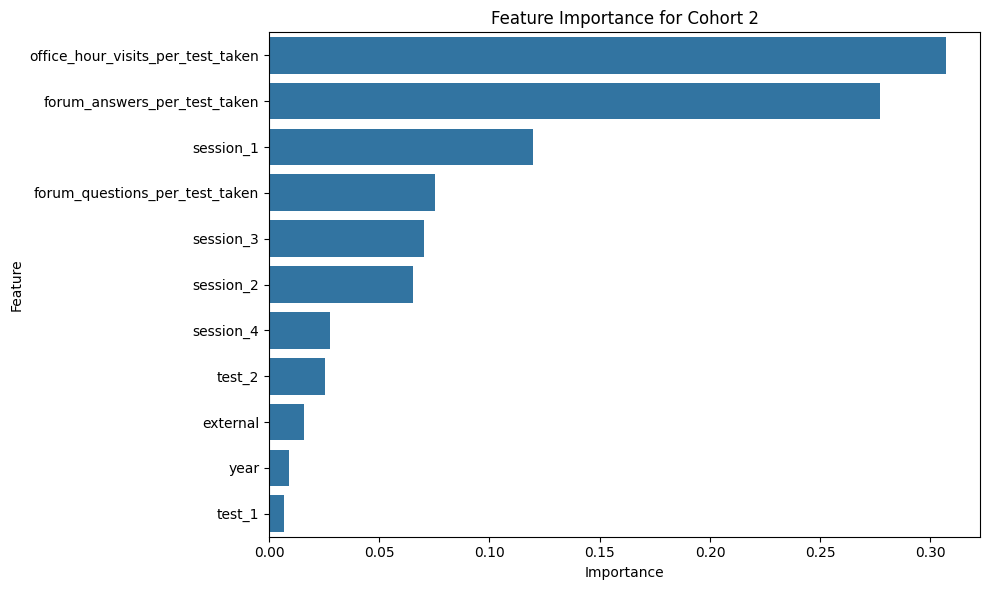

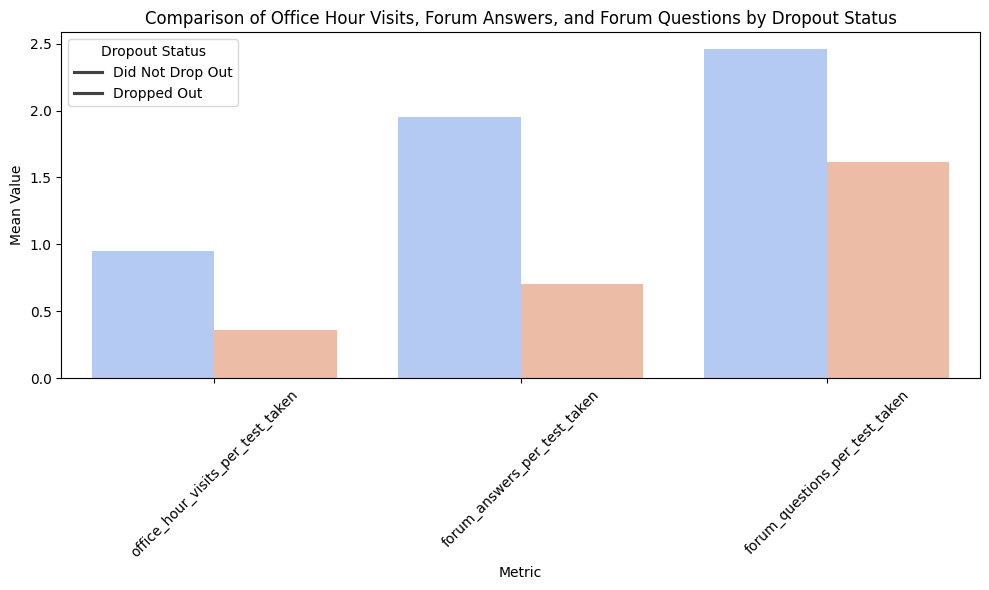


 random forest results for Cohort 3
Accuracy: 0.9719
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1442
         1.0       0.98      0.88      0.93       371

    accuracy                           0.97      1813
   macro avg       0.97      0.94      0.96      1813
weighted avg       0.97      0.97      0.97      1813

Confusion Matrix:
[[1434    8]
 [  43  328]]


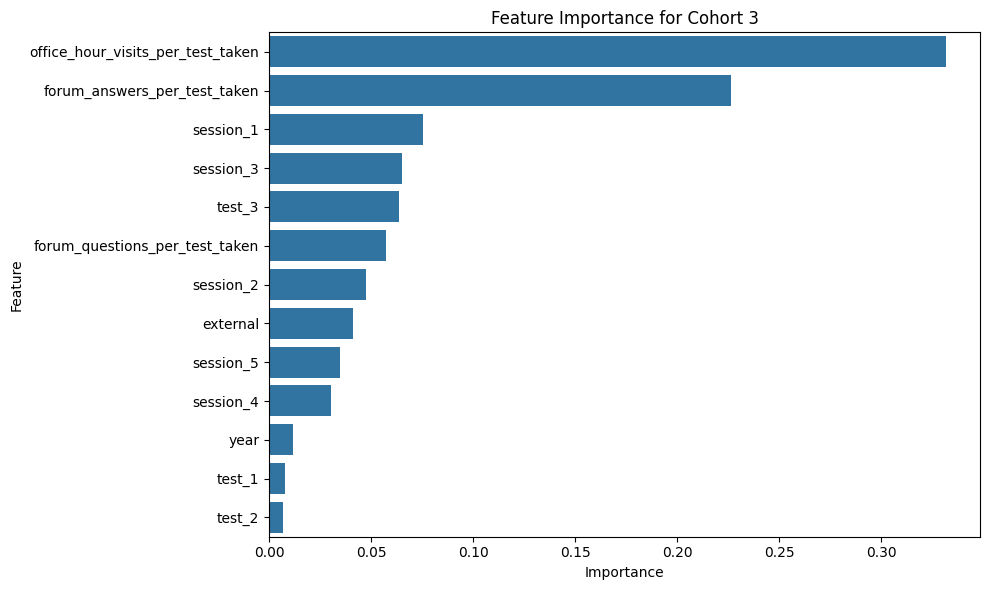

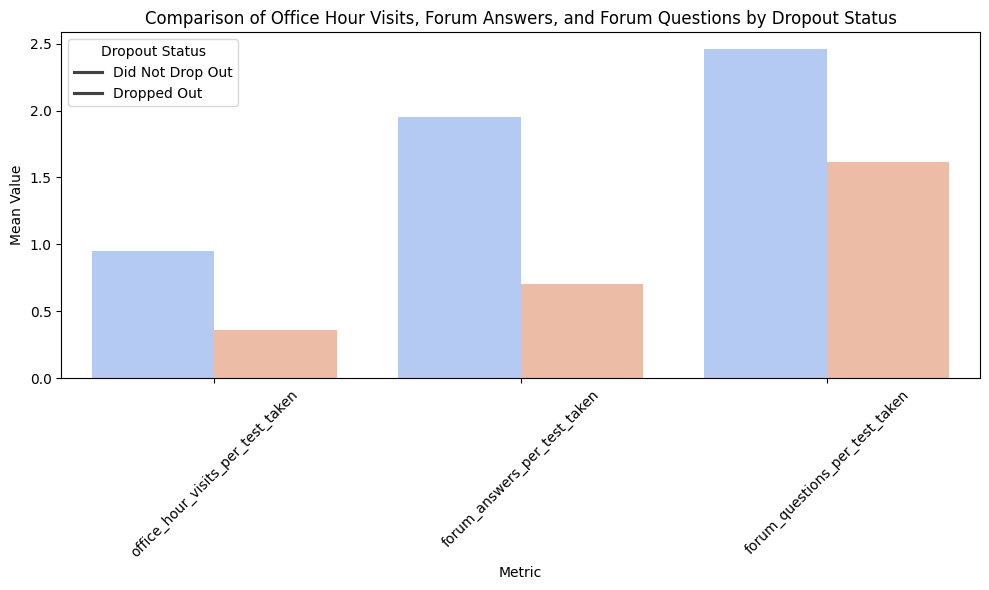


 random forest results for Cohort 4
Accuracy: 0.9821
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1468
         1.0       0.95      0.85      0.90       150

    accuracy                           0.98      1618
   macro avg       0.97      0.92      0.94      1618
weighted avg       0.98      0.98      0.98      1618

Confusion Matrix:
[[1461    7]
 [  22  128]]


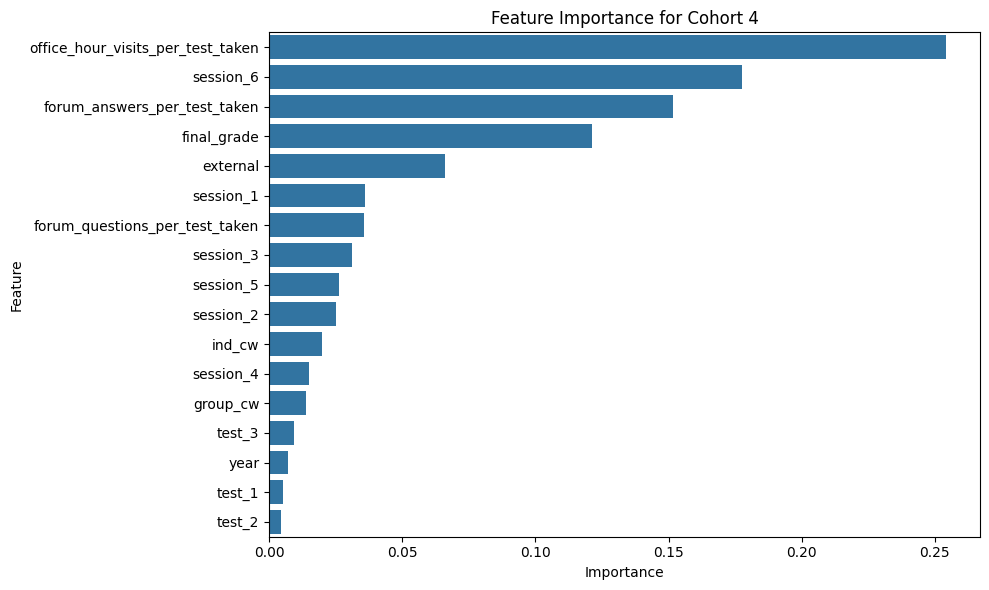

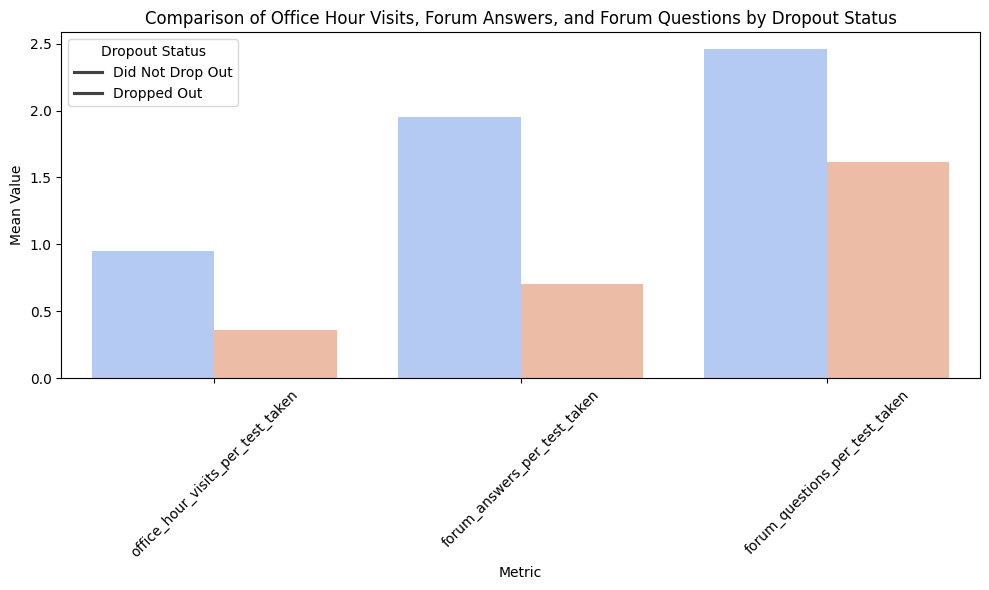

In [ ]:
# april 23
# neural network random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# function for random forest model

def random_forest(name, cohort):
    print(f"\n random forest results for {name}")


    # feature matrix and target
    X = cohort.drop(columns=['dropout'])
    y = cohort['dropout']

    # handle missing values
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # scale
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)

    # split data to test and train
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # train model
    rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    rf.fit(X_train, y_train)

    # predict and evaluate
    y_pred = rf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(matrix)

    # show feaeture importance from random forest model
    import matplotlib.pyplot as plt
    import seaborn as sns

    # feature importance to see what the model actually means
    importances = rf.feature_importances_
    feature_names = cohort.drop(columns=['dropout']).columns
    feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_df = feature_df.sort_values(by='Importance', ascending=False)

    # plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_df, x='Importance', y='Feature')
    plt.title(f'Feature Importance for {name}')
    plt.tight_layout()
    plt.show()

    # plot feaures vs dropout
    # Reshape the data to have 'metric' and 'value' columns
    metrics = ['office_hour_visits_per_test_taken', 'forum_answers_per_test_taken', 'forum_questions_per_test_taken']

    # Calculate the mean of each metric by dropout status
    df_melted = df.groupby('dropout')[metrics].mean().reset_index()

    # Melt the data to long format
    df_long = df_melted.melt(id_vars='dropout', value_vars=metrics,
                            var_name='metric', value_name='mean_value')

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_long, x='metric', y='mean_value', hue='dropout', palette='coolwarm')
    plt.title('Comparison of Office Hour Visits, Forum Answers, and Forum Questions by Dropout Status')
    plt.xlabel('Metric')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=45)
    plt.legend(title='Dropout Status', labels=['Did Not Drop Out', 'Dropped Out'])
    plt.tight_layout()
    plt.show()


cohorts = [
    ('Cohort 1', cohort1),
    ('Cohort 2', cohort2),
    ('Cohort 3', cohort3),
    ('Cohort 4', cohort4)
]

for name, cohort in cohorts:
    random_forest(name, cohort)

----- SVM for Cohort 1 with Grid Search -----
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[2089  100]
 [ 125 1061]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      2189
         1.0       0.91      0.89      0.90      1186

    accuracy                           0.93      3375
   macro avg       0.93      0.92      0.93      3375
weighted avg       0.93      0.93      0.93      3375

----- SVM for Cohort 2 with Grid Search -----
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.9363077917879081
Confusion Matrix:
 [[2093  102]
 [  95  803]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      2195
         1.0       0.89      0.89      0.89       898

    accuracy                           0.94      3093
   macro avg       0.92      0.92      0.

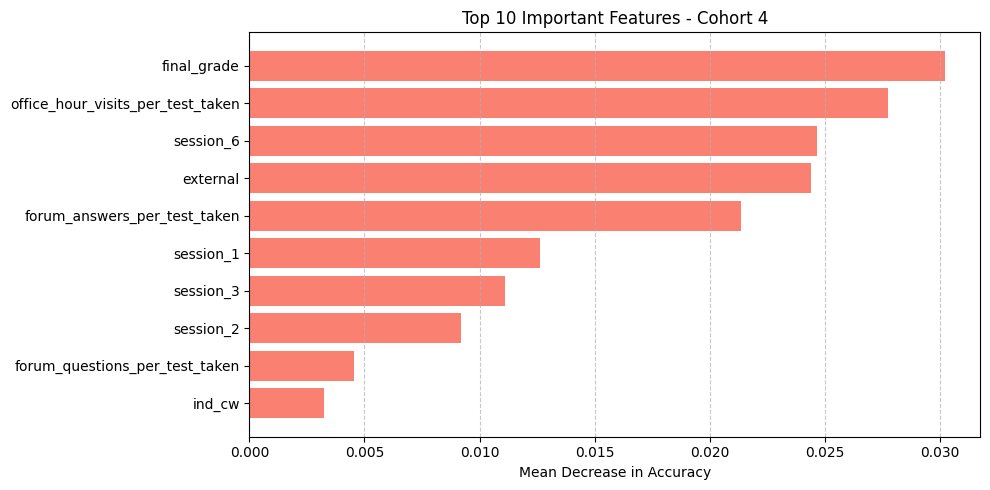

Average Accuracy: 0.9533


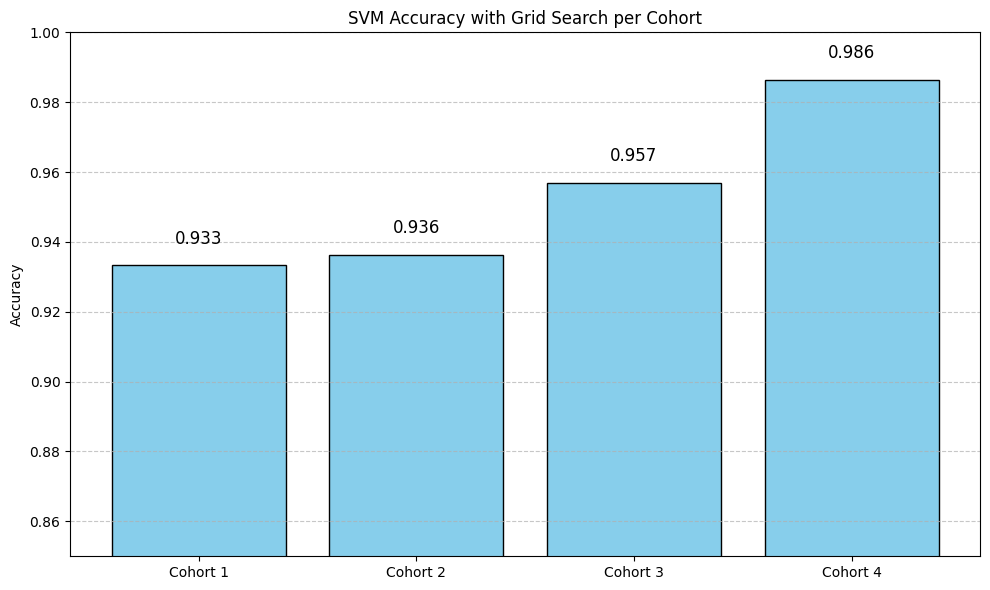

In [ ]:
# SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def svm_with_grid_search(cohort, cohort_name, analyze_features=False):
    print(f"----- SVM for {cohort_name} with Grid Search -----")

    # Separate features and labels
    X = cohort.drop(columns=['dropout'])
    y = cohort['dropout']
    feature_names = X.columns

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    # Define hyperparameter grid for SVM
    param_grid = {
        'C': [1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale']
    }

    # Grid Search
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=0)
    grid_search.fit(X_train, y_train)

    # Best model
    model = grid_search.best_estimator_
    print("Best Parameters:", grid_search.best_params_)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Only analyze cohort 4
    if analyze_features:
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': result.importances_mean
        }).sort_values(by='Importance', ascending=False)

        print("Top Features by Importance (Cohort 4):")
        print(importance_df.head(10))
        print()

        # Plot
        plt.figure(figsize=(10, 5))
        plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1], color='salmon')
        plt.xlabel("Mean Decrease in Accuracy")
        plt.title("Top 10 Important Features - Cohort 4")
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    return accuracy


# List to store accuracies
accuracies = []

# Run for each cohort
accuracies.append(svm_with_grid_search(cohort1, "Cohort 1"))
accuracies.append(svm_with_grid_search(cohort2, "Cohort 2"))
accuracies.append(svm_with_grid_search(cohort3, "Cohort 3"))
accuracies.append(svm_with_grid_search(cohort4, "Cohort 4", analyze_features=True))  # Feature analysis only cohort 4

# Average accuracy
average_accuracy = np.mean(accuracies)
print(f"Average Accuracy: {average_accuracy:.4f}")

# Accuracy bar plot
cohort_names = ["Cohort 1", "Cohort 2", "Cohort 3", "Cohort 4"]
plt.figure(figsize=(10, 6))
plt.bar(cohort_names, accuracies, color='skyblue', edgecolor='black')
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.3f}", ha='center', va='bottom', fontsize=12)

plt.ylim(0.85, 1.0)
plt.ylabel('Accuracy')
plt.title('SVM Accuracy with Grid Search per Cohort')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Cohort 1 - Best Params: {'metric': 'manhattan', 'n_neighbors': 9}
Accuracy: 0.9178
[[1390   70]
 [ 115  675]]
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      1460
         1.0       0.91      0.85      0.88       790

    accuracy                           0.92      2250
   macro avg       0.91      0.90      0.91      2250
weighted avg       0.92      0.92      0.92      2250



<Figure size 800x600 with 0 Axes>

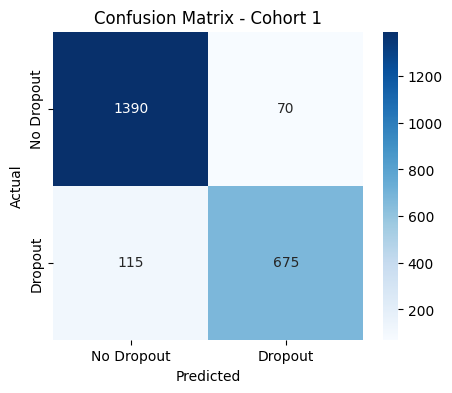


Cohort 2 - Best Params: {'metric': 'manhattan', 'n_neighbors': 9}
Accuracy: 0.9248
[[1397   62]
 [  93  510]]
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1459
         1.0       0.89      0.85      0.87       603

    accuracy                           0.92      2062
   macro avg       0.91      0.90      0.91      2062
weighted avg       0.92      0.92      0.92      2062



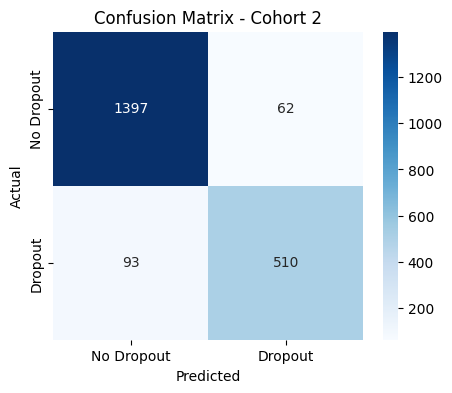


Cohort 3 - Best Params: {'metric': 'manhattan', 'n_neighbors': 11}
Accuracy: 0.9388
[[1418   24]
 [  87  284]]
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1442
         1.0       0.92      0.77      0.84       371

    accuracy                           0.94      1813
   macro avg       0.93      0.87      0.90      1813
weighted avg       0.94      0.94      0.94      1813



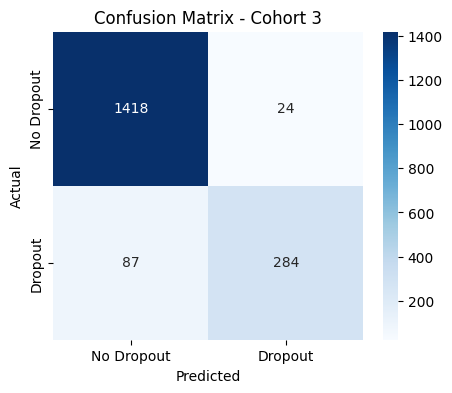


Cohort 4 - Best Params: {'metric': 'manhattan', 'n_neighbors': 15}
Accuracy: 0.9747
[[1460    8]
 [  33  117]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1468
         1.0       0.94      0.78      0.85       150

    accuracy                           0.97      1618
   macro avg       0.96      0.89      0.92      1618
weighted avg       0.97      0.97      0.97      1618



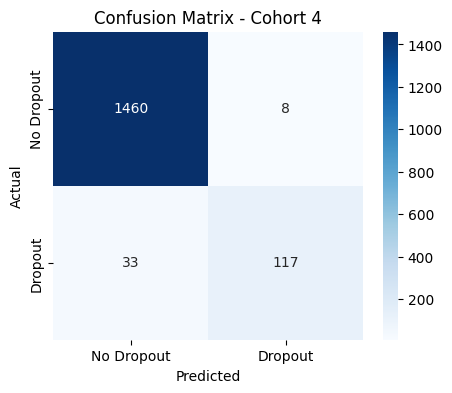

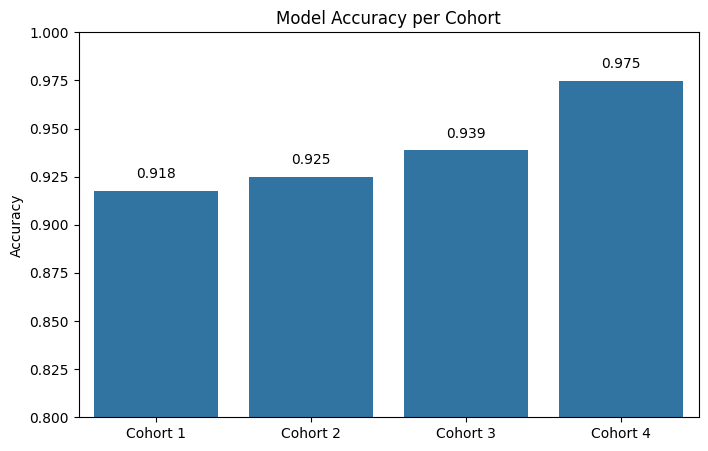

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc, roc_auc_score
)

# Confusion matrix
def plot_confusion(y_true, y_pred, cohort_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Dropout', 'Dropout'],
                yticklabels=['No Dropout', 'Dropout'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {cohort_name}')
    plt.show()

# Accuracy bar chart
def plot_accuracy_by_cohort(accuracies):
    cohorts = ['Cohort 1', 'Cohort 2', 'Cohort 3', 'Cohort 4']
    plt.figure(figsize=(8,5))
    sns.barplot(x=cohorts, y=accuracies)
    plt.ylim(0.8, 1)
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy per Cohort')

    for i, acc in enumerate(accuracies):
        plt.text(i, acc + 0.005, f"{acc:.3f}", ha='center', va='bottom', fontsize=10)

    plt.show()

# Perform KNN with Grid Search
def run_knn_grid(df, cohort_name, target='dropout'):
    X = df.drop(columns=[target])
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    param_grid = {
        'n_neighbors': list(range(1, 21)), # test k = 1 ...21
        'metric': ['euclidean', 'manhattan'] # test manhattan vs euclidean distance
    }

    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)

    print(f"\n{cohort_name} - Best Params: {grid.best_params_}")
    print(f"Accuracy: {acc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    plot_confusion(y_test, y_pred, cohort_name)

    return acc

# Run Grid Search KNN on each cohort
accuracies = []
plt.figure(figsize=(8,6))  # Prepare ROC plot

acc1 = run_knn_grid(cohort1, "Cohort 1")
accuracies.append(acc1)

acc2 = run_knn_grid(cohort2, "Cohort 2")
accuracies.append(acc2)

acc3 = run_knn_grid(cohort3, "Cohort 3")
accuracies.append(acc3)

acc4 = run_knn_grid(cohort4, "Cohort 4")
accuracies.append(acc4)

# Accuracy Comparison Bar Plot
plot_accuracy_by_cohort(accuracies)


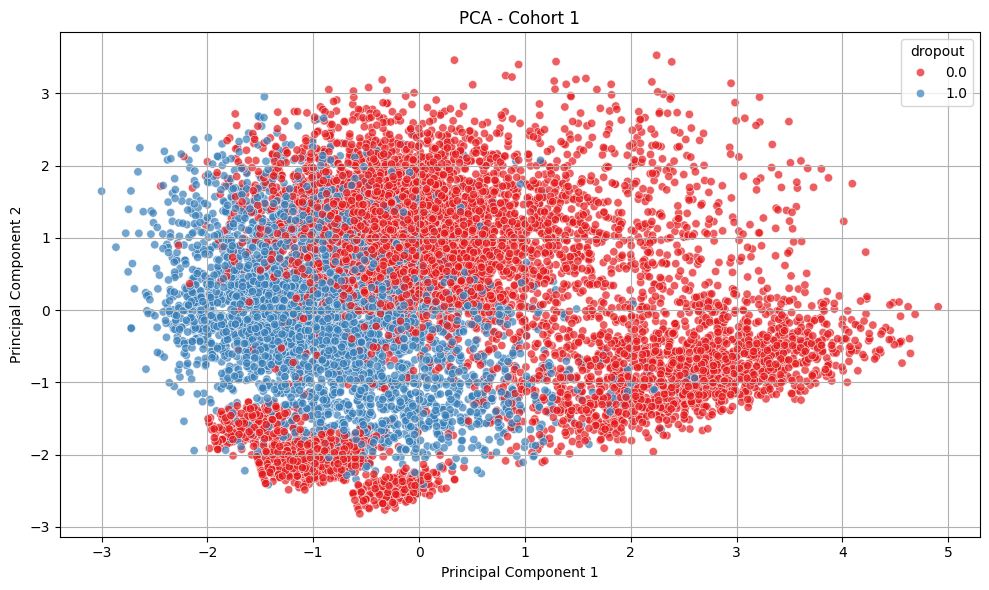

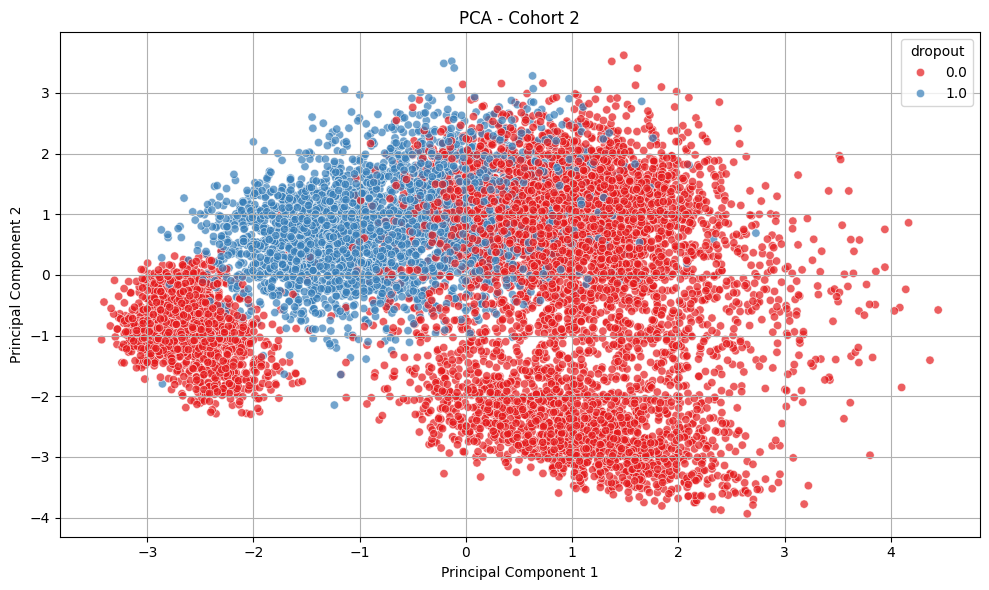

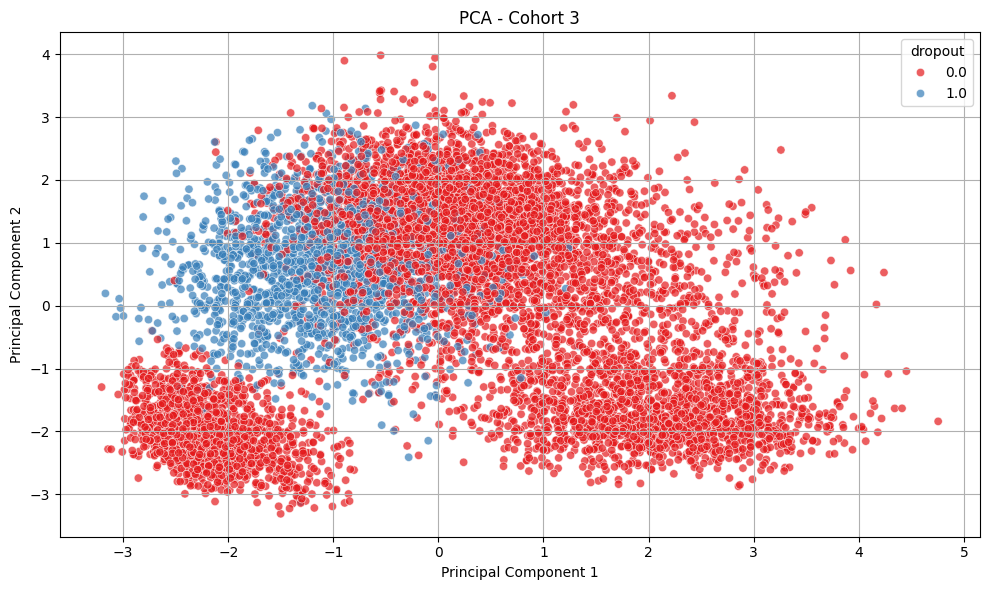

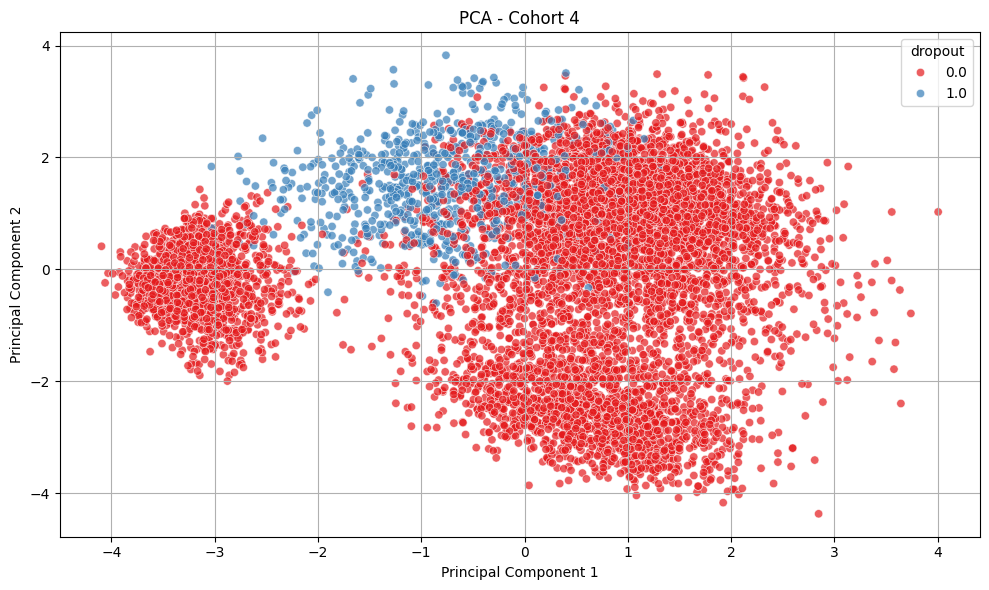

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def run_pca(df, target='dropout', n_components=2, cohort_name="Cohort"):
    # Drop the target column to focus on features
    features = df.drop(columns=[target])

    # Standardize features (important for PCA!)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features)

    # Run PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(X_scaled)

    # Create a DataFrame of principal components
    pca_df = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(n_components)])
    pca_df[target] = df[target].values

    # Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=pca_df,
        x="PC1", y="PC2",
        hue=target,
        palette="Set1",
        alpha=0.7
    )
    plt.title(f"PCA - {cohort_name}")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run
run_pca(cohort1, cohort_name="Cohort 1")
run_pca(cohort2, cohort_name="Cohort 2")
run_pca(cohort3, cohort_name="Cohort 3")
run_pca(cohort4, cohort_name="Cohort 4")


Cohort 1:


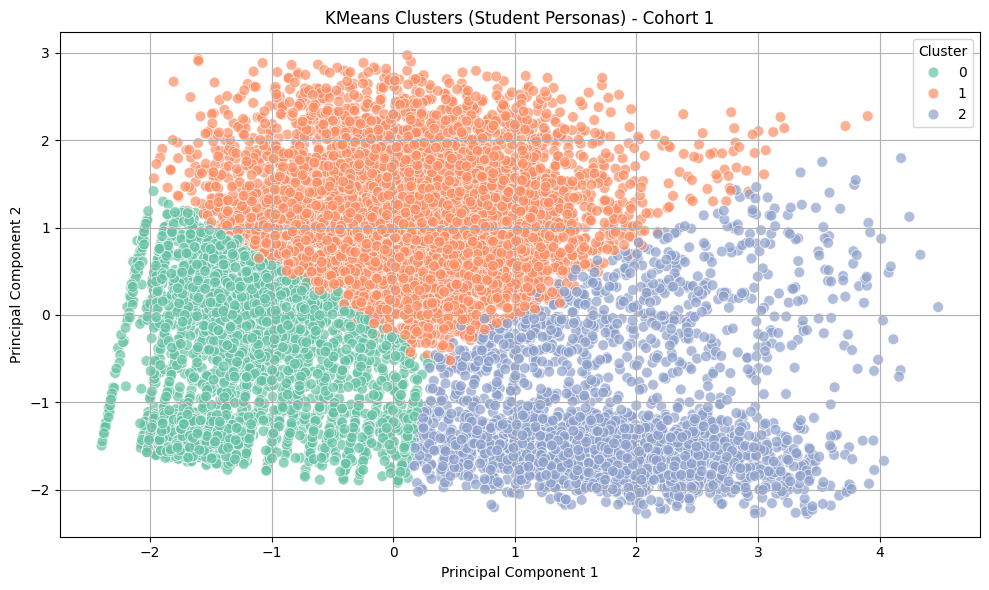

         office_hour_visits_per_test_taken  forum_answers_per_test_taken  \
cluster                                                                    
0                                 0.352473                      0.591410   
1                                 0.716260                      1.563606   
2                                 1.476900                      3.035384   

         forum_questions_per_test_taken  session_1  session_2   dropout  
cluster                                                                  
0                              1.054153  21.721741  22.769120  0.592593  
1                              2.363677  62.547346  64.435032  0.289172  
2                              3.704606  20.182276  24.290634  0.049559  

Cohort 2:


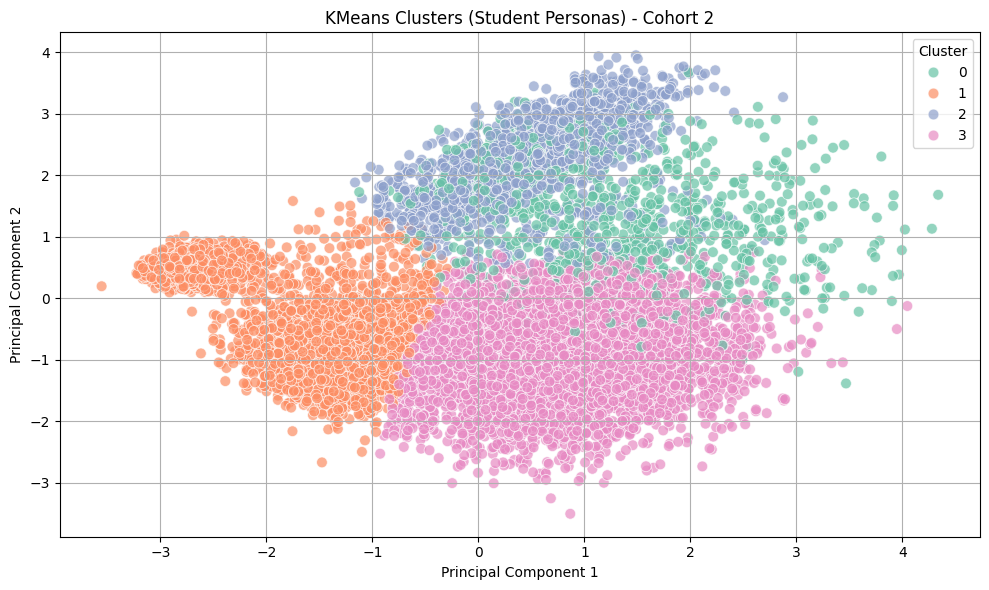

         office_hour_visits_per_test_taken  forum_answers_per_test_taken  \
cluster                                                                    
0                                 1.377913                      4.358663   
1                                 0.324413                      0.537976   
2                                 1.530473                      2.426560   
3                                 0.697023                      1.434845   

         forum_questions_per_test_taken  session_1  session_2  session_3  \
cluster                                                                    
0                              2.167427  40.105370  43.233029  47.359676   
1                              0.826265  23.922066  24.979030  21.663537   
2                              4.333503  12.544776  16.811398  40.185889   
3                              2.379755  61.145927  62.001075  65.482270   

         session_4   dropout  
cluster                       
0        46.855117  0.00

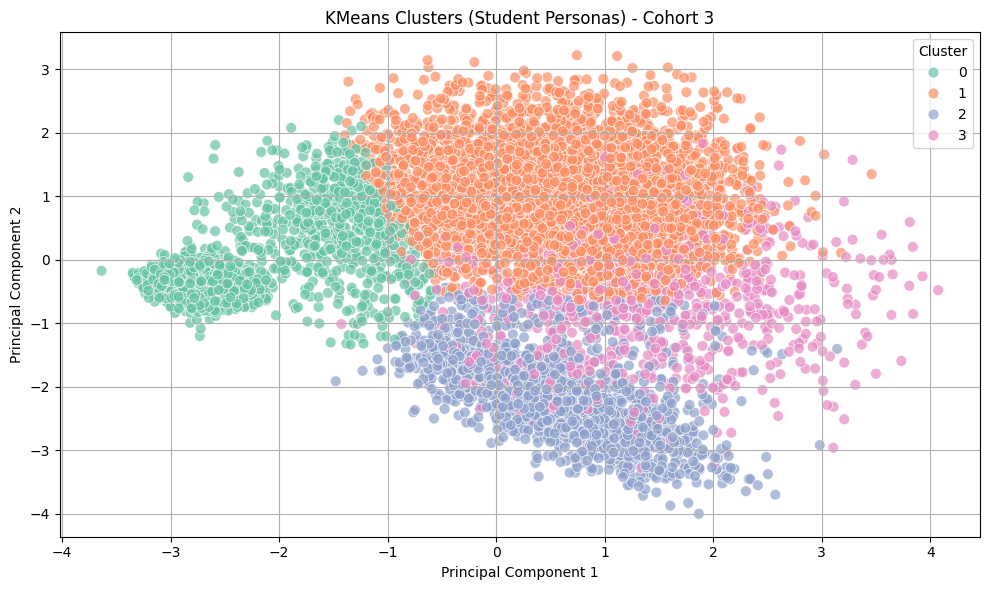

         office_hour_visits_per_test_taken  forum_answers_per_test_taken  \
cluster                                                                    
0                                 0.345680                      0.567164   
1                                 0.695063                      1.437337   
2                                 1.507023                      2.531281   
3                                 1.338322                      4.435739   

         forum_questions_per_test_taken  session_1  session_2  session_3  \
cluster                                                                    
0                              0.787844  14.824771  16.119266  14.697706   
1                              2.410815  60.361863  60.362552  65.606700   
2                              4.058528  13.112971  17.456665  40.245666   
3                              2.227700  45.124413  49.449531  48.842723   

         session_4  session_5   dropout  
cluster                                  
0 

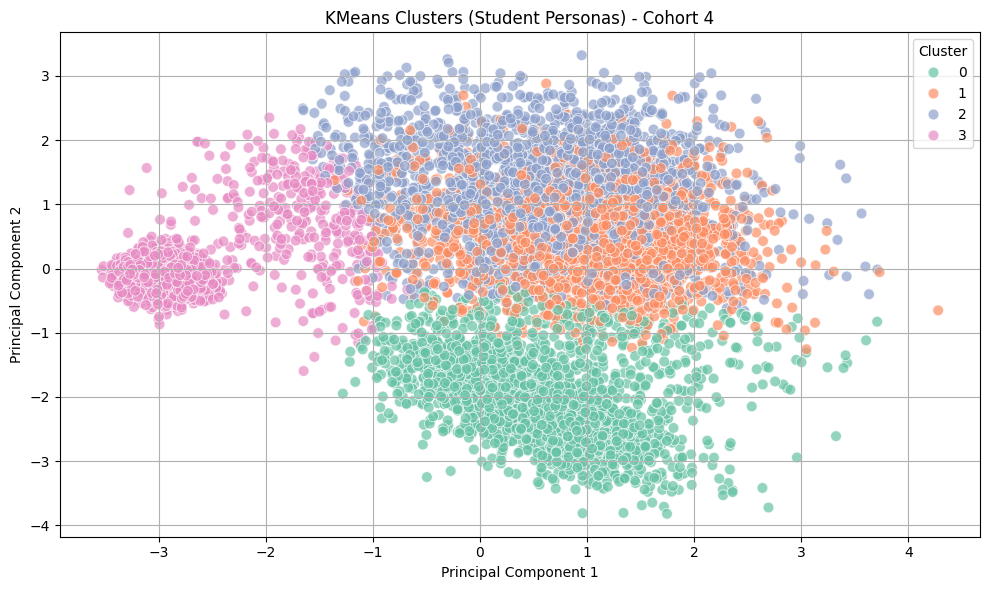

         office_hour_visits_per_test_taken  forum_answers_per_test_taken  \
cluster                                                                    
0                                 1.542255                      2.970737   
1                                 0.804305                      1.788595   
2                                 0.810749                      1.921848   
3                                 0.368962                      0.568295   

         forum_questions_per_test_taken  session_1  session_2  session_3  \
cluster                                                                    
0                              3.734990  16.404642  20.422301  39.880424   
1                              2.507669  57.630381  61.898070  67.918852   
2                              2.439032  62.059982  59.601576  63.365149   
3                              0.692532  11.546363  12.866185  11.591338   

         session_4  session_5  session_6   dropout  
cluster                          

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def cluster_student_personas(df, features, cohort_name="Cohort", n_clusters=4):
    # Drop rows with missing values in chosen features
    df_clean = df[features].dropna()

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_clean)

    # KMeans Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # PCA for visualization
    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(X_scaled)

    # Create DataFrame for plotting
    vis_df = pd.DataFrame({
        'PC1': pca_components[:, 0],
        'PC2': pca_components[:, 1],
        'Cluster': cluster_labels
    })

    # Plot clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=vis_df, x="PC1", y="PC2", hue="Cluster", palette="Set2", s=60, alpha=0.7)
    plt.title(f"KMeans Clusters (Student Personas) - {cohort_name}")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Combine with original data if needed for interpretation
    df_result = df.loc[df_clean.index].copy()
    df_result['cluster'] = cluster_labels

    return df_result

# Feature sets per cohort
features_c1 = [
    'office_hour_visits_per_test_taken',
    'forum_answers_per_test_taken',
    'forum_questions_per_test_taken',
    'session_1', 'session_2'
]

features_c2 = [
    'office_hour_visits_per_test_taken',
    'forum_answers_per_test_taken',
    'forum_questions_per_test_taken',
    'session_1', 'session_2', 'session_3', 'session_4'
]

features_c3 = [
    'office_hour_visits_per_test_taken',
    'forum_answers_per_test_taken',
    'forum_questions_per_test_taken',
    'session_1', 'session_2', 'session_3', 'session_4', 'session_5'
]

features_c4 = [
    'office_hour_visits_per_test_taken',
    'forum_answers_per_test_taken',
    'forum_questions_per_test_taken',
    'session_1', 'session_2', 'session_3',
    'session_4', 'session_5', 'session_6'
]


# Run clustering and print summary stats
print("Cohort 1:")
clustered_c1 = cluster_student_personas(cohort1, features_c1, cohort_name="Cohort 1", n_clusters=3)
print(clustered_c1.groupby("cluster")[features_c1 + ['dropout']].mean())

print("\nCohort 2:")
clustered_c2 = cluster_student_personas(cohort2, features_c2, cohort_name="Cohort 2", n_clusters=4)
print(clustered_c2.groupby("cluster")[features_c2 + ['dropout']].mean())

print("\nCohort 3:")
clustered_c3 = cluster_student_personas(cohort3, features_c3, cohort_name="Cohort 3", n_clusters=4)
print(clustered_c3.groupby("cluster")[features_c3 + ['dropout']].mean())

print("\nCohort 4:")
clustered_c4 = cluster_student_personas(cohort4, features_c4, cohort_name="Cohort 4", n_clusters=4)
print(clustered_c4.groupby("cluster")[features_c4 + ['dropout']].mean())
